<a href="https://colab.research.google.com/github/DJ-Adams/Visualization/blob/main/Preparing_Wide_Form_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
# set random seed
SEED = 321
np.random.seed(SEED)

In [2]:
## Customization Options
# plt.style.use(['fivethirtyeight'])#'seaborn-talk'])#,
plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=(12,4)
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
sns.set_context("talk", font_scale=0.9)

In [3]:
def format_xdates(ax, fig=None, xtick_fontweight='bold',
               title= None):
    """Formats x-axis with minor ticks every 3 months, and major
    ticks every year. Includes different grid options for visibility"""
    # create the locator to place ticks every 3 months.
    loc_3months = mdates.MonthLocator(interval=3)
    fmt_months = mdates.DateFormatter("%b")
    ## for major year ticks
    loc_year = mdates.YearLocator()
    fmt_year = mdates.DateFormatter("%Y")

    ## Change the font of the major ticks to stand out
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(),
                       fontweight=xtick_fontweight)

    ## customize minor ticks
    ax.xaxis.set_minor_locator(loc_3months)
    ax.xaxis.set_minor_formatter(fmt_months)
    ## customize major ticks
    ax.xaxis.set_major_locator(loc_year)
    ax.xaxis.set_major_formatter(fmt_year)
    ## Making major/minor gridlines visually distince
    ax.grid(which='minor',axis='x',ls=":")
    ax.grid(which='major',axis='x',color='k')
    if fig is None:
        fig = ax.get_figure()
    ## rotate the dates
    fig.autofmt_xdate(which='major',rotation=90,ha='center')
    return fig,ax

Wide vs Long-Form Data
Thus far with pandas, we have been using dataframes that have already been formatted where the ROWS are the time steps. This is called Long-Form.
It is very common to receive time series data where each COLUMN is a time step. This is "Wide-Form" data.
Below we will walk through converting covid19 data from wide-form to long-form using pd.melt


Corona Virus Time Series - Cases
The data set below is an example of a "Wide-Form" data set from the Novel Covid-19 Kaggle Data Set.

In [4]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRtZ3XGbdzViSOsO6Gam4LQAQTSrFMXSAz_CIcBmmQYBv9uuggbGcxUuqXtMeUPiHR9NyI6At3apf5d/pub?output=csv"
df = pd.read_csv(url)
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22,6/28/22,6/29/22,6/30/22,7/1/22,7/2/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,181987,182033,182072,182149,182228,182324,182403,182528,182594,182643
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,278211,278504,278793,279077,279077,279167,280298,280851,281470,282141
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,266015,266025,266030,266038,266049,266062,266073,266087,266105,266115
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,43774,43774,43774,43774,43774,43774,43774,43774,44177,44177
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,101320,101320,101320,101320,101320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,658503,658503,658503,658503,659853,659853,659853,659853,659853,659853
281,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
282,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11824,11824,11824,11824,11824,11824,11824,11824,11824,11824
283,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,324922,325110,325110,325110,325348,325498,325498,325857,325857,325857


pd.melt
Pandas has a function called pd.melt which is designed to turn wide-form data into long-form, but to let us keep some id columns intact. Its easier to understand once demonstrated.
The columns we want to keep associated with each timestamp will be our id_vars.
If we want EVERY other column to be converted to rows, that's all we need!
If we wanted only SOME columns converted to rows, we would use the value_vars argument.

In [5]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '6/23/22', '6/24/22', '6/25/22', '6/26/22', '6/27/22', '6/28/22',
       '6/29/22', '6/30/22', '7/1/22', '7/2/22'],
      dtype='object', length=897)

In [6]:
melted = pd.melt(df,id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'] )
melted

,Province/State,Country/Region,Lat,Long,variable,value
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
254500,NaN,West Bank and Gaza,31.952200,35.233200,7/2/22,659853
254501,NaN,Winter Olympics 2022,39.904200,116.407400,7/2/22,535
254502,NaN,Yemen,15.552727,48.516388,7/2/22,11824
254503,NaN,Zambia,-13.133897,27.849332,7/2/22,325857


Is this the result you expected?

Notice how all of the previous date columns have now been compressed into rows. Do you see the new column that includes the date? It is titled "variable". The corresponding original value in that column is in the "value" column. Take some time to compare the original df with the melted df to ensure you understand the transformation!

We can also provide the names we want to use for these 2 new columns. Since these values are confirmed cases of Covid, we will name this column "Confirmed".
To simplify our output, we also decided to drop the "Lat" and "Long" values here.

In [7]:
melted = pd.melt(df.drop(columns=['Lat','Long']),
                 id_vars=['Province/State', 'Country/Region'],
                value_name='Confirmed',var_name="Date")
melted

,Province/State,Country/Region,Date,Confirmed
0,NaN,Afghanistan,1/22/20,0
1,NaN,Albania,1/22/20,0
2,NaN,Algeria,1/22/20,0
3,NaN,Andorra,1/22/20,0
4,NaN,Angola,1/22/20,0
...,...,...,...,...
254500,NaN,West Bank and Gaza,7/2/22,659853
254501,NaN,Winter Olympics 2022,7/2/22,535
254502,NaN,Yemen,7/2/22,11824
254503,NaN,Zambia,7/2/22,325857


In [8]:
# First, we will convert the 'Date' column values to datetime objects.

melted['Date'] = pd.to_datetime(melted['Date'])
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254505 entries, 0 to 254504
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Province/State  79477 non-null   object        
 1   Country/Region  254505 non-null  object        
 2   Date            254505 non-null  datetime64[ns]
 3   Confirmed       254505 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 7.8+ MB


Notice that in this dataset, we have the same dates repeated many times, one for each country in the dataset.

We will need to set Date as our index, but we will NOT resample just yet



In [9]:
melted = melted.set_index("Date")
melted

,Province/State,Country/Region,Confirmed
Date,,,
2020-01-22,NaN,Afghanistan,0
2020-01-22,NaN,Albania,0
2020-01-22,NaN,Algeria,0
2020-01-22,NaN,Andorra,0
2020-01-22,NaN,Angola,0
...,...,...,...
2022-07-02,NaN,West Bank and Gaza,659853
2022-07-02,NaN,Winter Olympics 2022,535
2022-07-02,NaN,Yemen,11824


What do you think will happen if we resample the data at this point?

Let's give it a try and inspect the results.

In [ ]:
# take a look at what happens when we resample (DO NOT USE)
melted.resample("D").sum()

We now have the sum of all cases for each day, BUT what information have we lost? We did have data broken down by country, but when we resampled, all the data for each day were combined into a single result. We will explore how can we resample while maintaining the original granularity of our data in the next section.

## 2. Combining .groupby and .resample for groupwise- time series processing

In [10]:
## There are 199 unique countries included
melted['Country/Region'].nunique()

199

We can combine a groupby by for Country/Region with a .resample("D") to resample the data in a group-wise manner.
The only caveat/complexity that this introduces is that we will now have 2 columns for our index: a MultiIndex
Note that when we use .resample, we must include a method to aggregate. Since we only have one value per day per country, you may have thought .asfreq() would work, but this will not work with groupby. It does not make a difference which aggregation method we use because the mathematical result is the same. For example, we could aggregate by using .last(), .first(), or .mean(). We used .sum() in the code below. Try the other methods to confirm they give the same results!

In [11]:
df_ts = melted.groupby('Country/Region').resample("D").sum()
df_ts

<ipython-input-11-9cf6932e1541>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted.groupby('Country/Region').resample("D").sum()


Confirmed
Country/Region Date                 
Afghanistan    2020-01-22          0
               2020-01-23          0
               2020-01-24          0
               2020-01-25          0
               2020-01-26          0
...                              ...
Zimbabwe       2022-06-28     255383
               2022-06-29     255520
               2022-06-30     255586
               2022-07-01     255586
               2022-07-02     255586

[177707 rows x 1 columns]

In [12]:
df_ts = melted.groupby('Country/Region').resample("D").mean()
df_ts

<ipython-input-12-1fbf63cc5ddd>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted.groupby('Country/Region').resample("D").mean()


Confirmed
Country/Region Date                 
Afghanistan    2020-01-22        0.0
               2020-01-23        0.0
               2020-01-24        0.0
               2020-01-25        0.0
               2020-01-26        0.0
...                              ...
Zimbabwe       2022-06-28   255383.0
               2022-06-29   255520.0
               2022-06-30   255586.0
               2022-07-01   255586.0
               2022-07-02   255586.0

[177707 rows x 1 columns]

In [13]:
df_ts.head().index

MultiIndex([('Afghanistan', '2020-01-22'),
            ('Afghanistan', '2020-01-23'),
            ('Afghanistan', '2020-01-24'),
            ('Afghanistan', '2020-01-25'),
            ('Afghanistan', '2020-01-26')],
           names=['Country/Region', 'Date'])

Notice, though, that we have maintained our ability to locate information for particular countries!

In [14]:
df_ts.loc['Afghanistan']

,Confirmed
Date,
2020-01-22,0.0
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0
...,...
2022-06-28,182324.0
2022-06-29,182403.0
2022-06-30,182528.0


In [15]:
df_ts.loc['Japan']

,Confirmed
Date,
2020-01-22,2.0
2020-01-23,2.0
2020-01-24,2.0
2020-01-25,2.0
2020-01-26,4.0
...,...
2022-06-28,9270305.0
2022-06-29,9293629.0
2022-06-30,9316954.0


Filtering by Date with a MultiIndex using pd.IndexSlice

While we can easily filter by country, we now have altered how we must filter by date.

Let's say we wanted to limit our data to just the year 2020. If you try the method that we would use with a single index, you will get an error.

In [ ]:
# This will not work with our multiIndex
# df_ts.loc['2020']

Instead, we can use pd.IndexSlice with .loc to filter for all values in 2020.

In [16]:
df_ts.loc[pd.IndexSlice[:, '2020'],:]

Confirmed
Country/Region Date                 
Afghanistan    2020-01-22        0.0
               2020-01-23        0.0
               2020-01-24        0.0
               2020-01-25        0.0
               2020-01-26        0.0
...                              ...
Zimbabwe       2020-12-27    13077.0
               2020-12-28    13148.0
               2020-12-29    13325.0
               2020-12-30    13625.0
               2020-12-31    13867.0

[68655 rows x 1 columns]

We can also filter by both date and country. For example, if we just want the countries from Afghanistan to Algeria (alphabetically) and the data for 2020:

In [17]:
df_ts.loc[pd.IndexSlice['Afghanistan':'Algeria','2020'],:]

Confirmed
Country/Region Date                 
Afghanistan    2020-01-22        0.0
               2020-01-23        0.0
               2020-01-24        0.0
               2020-01-25        0.0
               2020-01-26        0.0
...                              ...
Algeria        2020-12-27    98249.0
               2020-12-28    98631.0
               2020-12-29    98988.0
               2020-12-30    99311.0
               2020-12-31    99610.0

[1035 rows x 1 columns]

## Plotting with a MultiIndex

Let's go ahead and visualize the time series data! Specifically, let's plot the number of Confirmed Cases for several countries in North America (US, Mexico, Canada).

In [18]:
countries = ['Canada','Mexico','US']
plot_df = df_ts.loc[countries].copy()
plot_df

Confirmed
Country/Region Date                    
Canada         2020-01-22  0.000000e+00
               2020-01-23  1.250000e-01
               2020-01-24  1.875000e-01
               2020-01-25  1.875000e-01
               2020-01-26  1.875000e-01
...                                 ...
US             2022-06-28  8.729633e+07
               2022-06-29  8.749082e+07
               2022-06-30  8.762749e+07
               2022-07-01  8.782197e+07
               2022-07-02  8.783862e+07

[2679 rows x 1 columns]

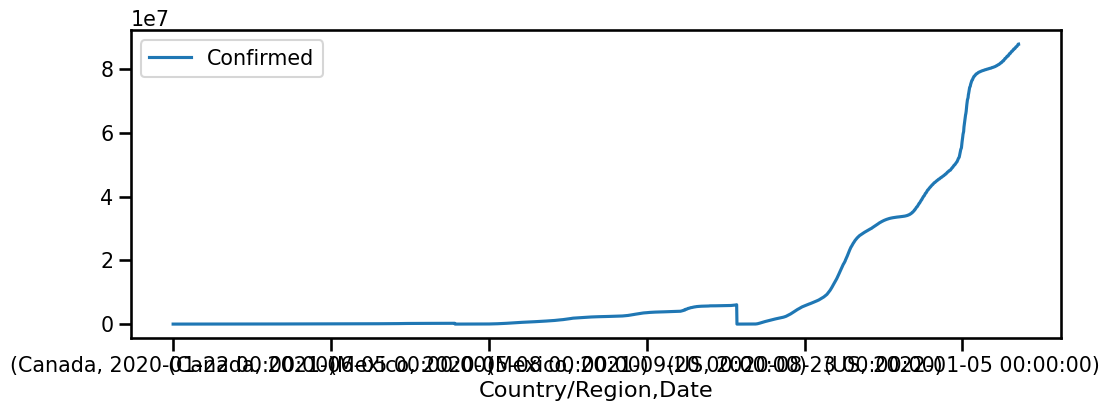

In [19]:
plot_df.plot(figsize=(12,4));

Oh, no! What happened?!

When we have a multi-index, creating visualizations becomes more complex. Pandas is confused about what should be considered a group, and it has lumped all of the data together into 1 line.
In order to visualize each country as a separate line, we will have to modify our multi-index (temporarily). We need Pandas to consider each country as its own separate column so that we get a line for each country.
To do so, we can leverage the .unstack() method.

## Using unstack() for Plotting with a MultiIndex

Understanding Index Levels

Right now, we have a multi-index with 2 levels.
Level 0 (the outer-most index on the left): Country
Level 1 (the next/inner index): Date
To demonstrate, let's use the df.index.get_level_values() function to get the values from 1 index at a time.

In [20]:
# level 0 is Country/Region
plot_df.index.get_level_values(0)

Index(['Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada',
       'Canada', 'Canada', 'Canada',
       ...
       'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US'],
      dtype='object', name='Country/Region', length=2679)

In [21]:
# level 1 is Date
plot_df.index.get_level_values(1)

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2022-06-23', '2022-06-24', '2022-06-25', '2022-06-26',
               '2022-06-27', '2022-06-28', '2022-06-29', '2022-06-30',
               '2022-07-01', '2022-07-02'],
              dtype='datetime64[ns]', name='Date', length=2679, freq=None)

According to the Pandas documentation for .unstack(), it will "pivot a level of the (necessarily hierarchical) index labels."
So .unstack() will allow us to pivot our data in a way that we can keep our Date as the index and convert our outer index (Country/Region) into columns, which is exactly what we need.

## Applying unstack() for Our Visualization
Unstack accepts a "level" argument for which level of our multi-index should be converted into columns.
Since we want the outermost index (level 0) to become the columns, we will need to specify level=0.

In [22]:
unstacked = plot_df.unstack(level=0)
unstacked

Confirmed                       
Country/Region       Canada     Mexico          US
Date                                              
2020-01-22           0.0000        0.0         1.0
2020-01-23           0.1250        0.0         1.0
2020-01-24           0.1875        0.0         2.0
2020-01-25           0.1875        0.0         2.0
2020-01-26           0.1875        0.0         5.0
...                     ...        ...         ...
2022-06-28      246593.3125  5986917.0  87296327.0
2022-06-29      246757.0000  5986917.0  87490815.0
2022-06-30      247142.1875  6034602.0  87627486.0
2022-07-01      247231.5000  6058689.0  87821971.0
2022-07-02      247306.0625  6058689.0  87838623.0

[893 rows x 3 columns]

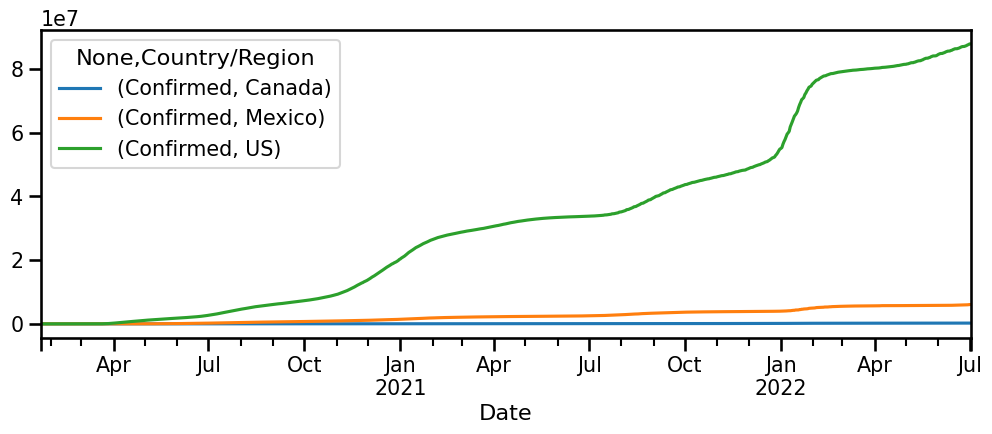

In [23]:
ax = unstacked.plot()

And there we go! We were able to plot each country as a separate line.
The one remaining issue is our legend.
Why do we now have (Confirmed, CountryName) for all of the countries?
If we take a look at the columns of our unstacked dataframe, we will see that we have now created a MultiIndex.

In [24]:
unstacked.columns

MultiIndex([('Confirmed', 'Canada'),
            ('Confirmed', 'Mexico'),
            ('Confirmed',     'US')],
           names=[None, 'Country/Region'])

By slicing out the "Confirmed" column from our multi-index before we plot, we will have bypassed the outer level of our MultiIndex, so we will not see the "Confirmed" column name appear in our legend.

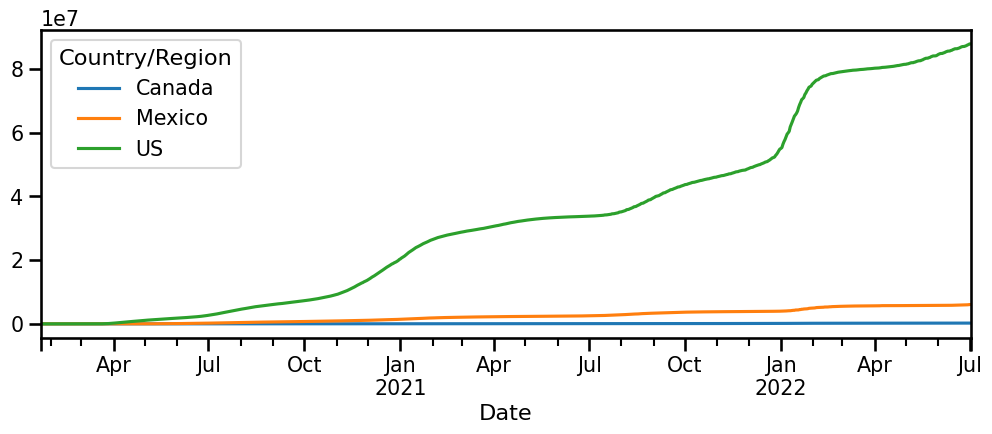

In [25]:
ax = unstacked['Confirmed'].plot()

## Selecting 1 Country to Analyze

To continue our exploration of the data, let's separate the US from the rest of the datasets (but keep all the dates).

In [26]:
ts_us = df_ts.loc['US', 'Confirmed']
ts_us.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2022-06-23', '2022-06-24', '2022-06-25', '2022-06-26',
               '2022-06-27', '2022-06-28', '2022-06-29', '2022-06-30',
               '2022-07-01', '2022-07-02'],
              dtype='datetime64[ns]', name='Date', length=893, freq='D')

As we can see, we have a successfully created our time series for the use with a proper datetime index.
Now we can plot our time series data.

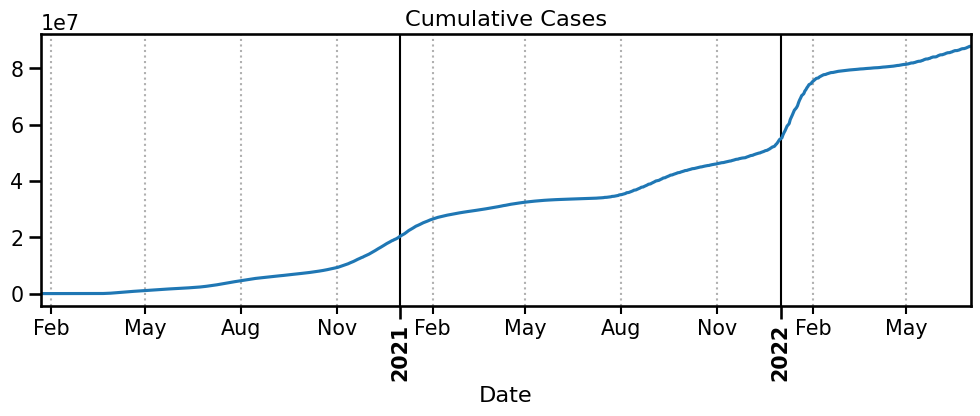

In [27]:
ax = ts_us.plot(style='-',title="Cumulative Cases");
format_xdates(ax);

### Drilling Down into the US
We want to get a more detailed view of what happening in specific states in the U.S.

Slice out just values for the US into a new dataframe.
Check the Province/State column for us states

In [28]:
## check for states
df_us = melted[melted['Country/Region']=='US']
df_us

,Province/State,Country/Region,Confirmed
Date,,,
2020-01-22,NaN,US,1
2020-01-23,NaN,US,1
2020-01-24,NaN,US,2
2020-01-25,NaN,US,2
2020-01-26,NaN,US,5
...,...,...,...
2022-06-28,NaN,US,87296327
2022-06-29,NaN,US,87490815
2022-06-30,NaN,US,87627486


In [29]:
df_us['Province/State'].unique()

array([nan], dtype=object)

Unfortunately, this dataset doesn't include the level of detail we want!
To explore Covid cases by state, we will use a different data set.
We will start the state-based analysis in the next lesson.